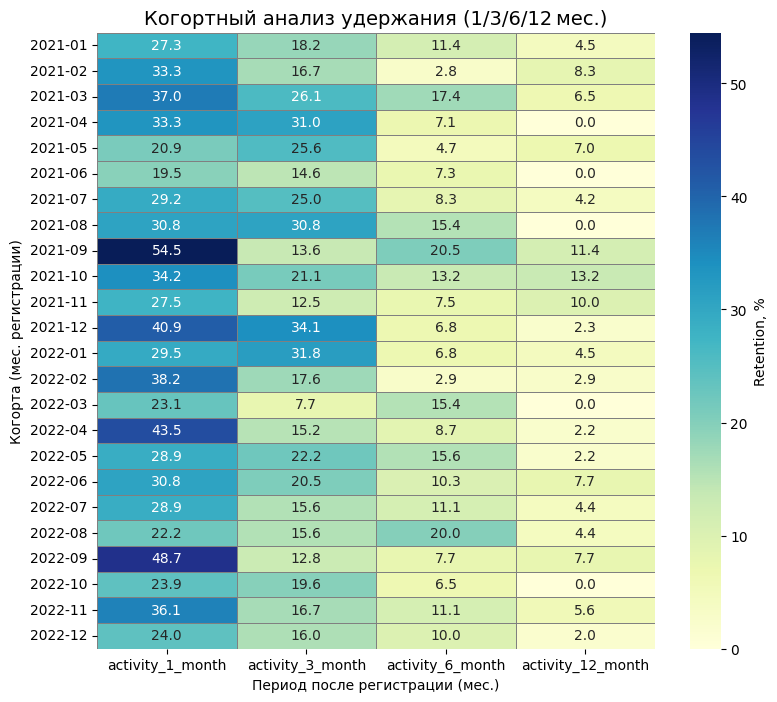


Таблица удержания (в %):
         activity_1_month  activity_3_month  activity_6_month  \
cohort                                                          
2021-01              27.3              18.2              11.4   
2021-02              33.3              16.7               2.8   
2021-03              37.0              26.1              17.4   
2021-04              33.3              31.0               7.1   
2021-05              20.9              25.6               4.7   
2021-06              19.5              14.6               7.3   
2021-07              29.2              25.0               8.3   
2021-08              30.8              30.8              15.4   
2021-09              54.5              13.6              20.5   
2021-10              34.2              21.1              13.2   
2021-11              27.5              12.5               7.5   
2021-12              40.9              34.1               6.8   
2022-01              29.5              31.8               6.8   

In [4]:
# ------------------------------------------------------------------
#   Когортный анализ удержания (1/3/6/12 месяцев) + тепловая карта
# ------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Загрузка ---------------------------------------------------
df = pd.read_csv('cohort_analysis_data.csv',
                 parse_dates=['registration_date'])

# --- 2. Формируем когорту (мес‑регистрации) ------------------------
df['cohort'] = df['registration_date'].dt.to_period('M')

# --- 3. Размер когорты --------------------------------------------
cohort_sizes = df.groupby('cohort').size().rename('size')

# --- 4. Суммы активности -----------------------------------------
activity_cols = ['activity_1_month',
                 'activity_3_month',
                 'activity_6_month',
                 'activity_12_month']

cohort_activity = df.groupby('cohort')[activity_cols].sum()

# --- 5. Retention в процентах ------------------------------------
cohort_retention = (cohort_activity.T / cohort_sizes).T * 100
cohort_retention = cohort_retention.round(1)

# Делаем индексы строковыми типами (для heatmap)
cohort_retention.index = cohort_retention.index.astype(str)

# --- 6. Тепловая карта -------------------------------------------
plt.figure(figsize=(9, 8))
sns.heatmap(cohort_retention,
            annot=True, fmt='.1f',
            cmap='YlGnBu',
            linewidths=.5,
            linecolor='gray',
            cbar_kws={'label': 'Retention, %'})
plt.title('Когортный анализ удержания (1/3/6/12 мес.)',
          fontsize=14)
plt.xlabel('Период после регистрации (мес.)')
plt.ylabel('Когорта (мес. регистрации)')
plt.yticks(rotation=0)
plt.show()

# --- 7. Вывод таблицы --------------------------------------------
print('\nТаблица удержания (в %):')
print(cohort_retention)
